In [ ]:

!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.2 MB/s 
     |████████████████████████████████| 9.8 MB 43.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/city_day.csv',index_col='Date',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head

Shape of data (6236, 15)


<bound method NDFrame.head of                      City  PM2.5    PM10    NO    NO2    NOx    NH3    CO  \
Date                                                                        
2017-11-25      Amaravati  71.36  124.50  1.44  20.50  12.08  10.72  0.12   
2017-11-26      Amaravati  71.36  129.06  1.26  26.00  14.85  10.28  0.14   
2017-11-27      Amaravati  71.36  135.32  6.60  30.85  21.77  12.91  0.11   
2017-11-28      Amaravati  71.36  104.09  2.56  28.07  17.01  11.42  0.09   
2017-11-29      Amaravati  71.36  114.84  5.23  23.20  16.59  12.25  0.16   
...                   ...    ...     ...   ...    ...    ...    ...   ...   
2020-06-26  Visakhapatnam   7.63   32.27  5.91  23.27  17.19  11.15  0.46   
2020-06-27  Visakhapatnam  15.02   50.94  7.68  25.06  19.54  12.47  0.47   
2020-06-28  Visakhapatnam  24.38   74.09  3.42  26.06  16.53  11.99  0.52   
2020-06-29  Visakhapatnam  22.91   65.73  3.45  29.53  18.33  10.71  0.48   
2020-06-30  Visakhapatnam  16.64   49.97  4.05

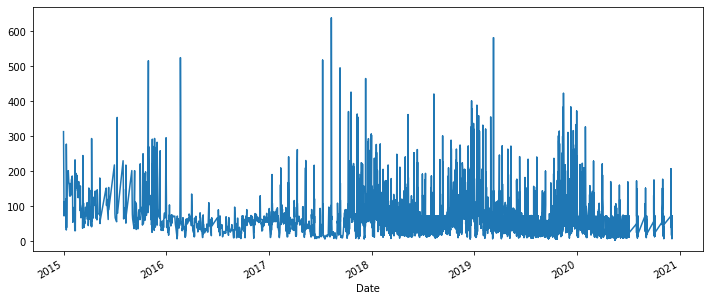

In [ ]:
df['PM2.5'].plot(figsize=(12,5))

In [ ]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
  dftest=adfuller(dataset,autolag='AIC')
  print("1.ADF: ",dftest[0])
  print("2. P-value: ",dftest[1])
  print("3. Num of Lags: ",dftest[2])
  print("4. Num of observation used for ADF Regression and Critical Values Calculation: ",dftest[3])
  print("5. Critical Values: ")
  for key, val in dftest[4].items():
    print("\t",key,": ",val)

In [ ]:
ad_test(df['PM2.5'])

1.ADF:  -5.980824257003144
2. P-value:  1.8403408425566062e-07
3. Num of Lags:  23
4. Num of observation used for ADF Regression and Critical Values Calculation:  6212
5. Critical Values: 
	 1% :  -3.4314031236715627
	 5% :  -2.8620053867710293
	 10% :  -2.567017722503109


In [ ]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit=auto_arima(df['PM2.5'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=57159.105, Time=5.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=58047.976, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=57979.671, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=57906.369, Time=1.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=58045.977, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=57170.742, Time=3.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=57191.117, Time=4.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=57157.057, Time=5.87 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=57160.740, Time=5.96 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=57158.129, Time=18.93 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=57155.627, Time=13.78 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=57157.952, Time=9.09 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=57157.569, Time=18.09 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=57157.557, Time=16.01 sec
 ARIMA(2,1,4)(0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6236
Model:               SARIMAX(3, 1, 3)   Log Likelihood              -28569.819
Date:                Mon, 17 Oct 2022   AIC                          57153.638
Time:                        08:40:01   BIC                          57200.804
Sample:                             0   HQIC                         57169.986
                               - 6236                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4475      0.138     -3.254      0.001      -0.717      -0.178
ar.L2          0.1436      0.040      3.610      0.000       0.066       0.222
ar.L3          0.2241      0.030      7.490      0.000       0.165       0.283
ma.L1          0.2265      0.138      1.646      0.100      -0.043       0.496
ma.L2         -0.5504      0.065     -8.520      0.000      -0.677      -0.424
ma.L3         -0.4051      0.061     -6.620      0.000      -0.525      -0.285
sigma2       559.1558      2.155    259.506      0.000     554.933     563.379
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            507374.39
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                             2.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        46.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(6236, 15)
(6206, 15) (30, 15)


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [ ]:
model=sm.tsa.arima.ARIMA(train['PM2.5'],order=(3,1,3))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  PM2.5   No. Observations:                 6206
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -28445.951
Date:                Mon, 17 Oct 2022   AIC                          56905.902
Time:                        08:41:21   BIC                          56953.034
Sample:                             0   HQIC                         56922.241
                               - 6206                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4442      0.140     -3.178      0.001      -0.718      -0.170
ar.L2          0.1436      0.040      3.584      0.000       0.065       0.222
ar.L3          0.2233      0.030      7.382      0.000       0.164       0.283
ma.L1          0.2233      0.140      1.597      0.110      -0.051       0.497
ma.L2         -0.5498      0.065     -8.414      0.000      -0.678      -0.422
ma.L3         -0.4031      0.062     -6.479      0.000      -0.525      -0.281
sigma2       561.6434      2.174    258.356      0.000     557.383     565.904
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            500671.20
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                             2.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        46.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index=df.index[start:end+1]
print(pred)

Date
2020-01-06    18.946960
2020-02-06    20.626206
2020-03-06    20.559753
2020-04-06    20.322853
2020-05-06    20.793559
2020-06-06    20.535601
2020-07-06    20.664894
2020-08-06    20.675529
2020-09-06    20.631768
2020-10-06    20.681608
2020-11-06    20.655558
2020-12-06    20.664516
2020-06-13    20.667926
2020-06-14    20.661880
2020-06-15    20.667056
2020-06-16    20.664650
2020-06-17    20.665112
2020-06-18    20.665717
2020-06-19    20.664977
2020-06-20    20.665496
2020-06-21    20.665295
2020-06-22    20.665293
2020-06-23    20.665381
2020-06-24    20.665297
2020-06-25    20.665346
2020-06-26    20.665332
2020-06-27    20.665327
2020-06-28    20.665338
2020-06-29    20.665329
2020-06-30    20.665333
Name: predicted_mean, dtype: float64


In [ ]:
test['PM2.5'].mean() 

23.421666666666667

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['PM2.5']))
print(rmse)

8.255601902964926


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model2=sm.tsa.arima.ARIMA(df['PM2.5'],order=(3,1,3))
model2=model2.fit()
df.tail()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2020-06-26,Visakhapatnam,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0,Good
2020-06-27,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
2020-06-28,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
2020-06-29,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
2020-06-30,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
start=len(train)
end=len(train)+len(test)-1
index_future_dates=pd.date_range(start='2022-01-01',end='2022-01-30')
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
# pred.index=index_future_dates
print(pred)
# pred.index=df.index[start:end+1]
# print(pred)

6236    17.872707
6237    19.651250
6238    20.017839
6239    20.385424
6240    20.672159
6241    20.678783
6242    20.799369
6243    20.810620
6244    20.824383
6245    20.846864
6246    20.841302
6247    20.850103
6248    20.850404
6249    20.850287
6250    20.852355
6251    20.851480
6252    20.852142
6253    20.852184
6254    20.852064
6255    20.852272
6256    20.852171
6257    20.852220
6258    20.852230
6259    20.852210
6260    20.852231
6261    20.852221
6262    20.852224
6263    20.852226
6264    20.852223
6265    20.852226
6266    20.852225
Name: ARIMA Predictions, dtype: float64
